##### Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv(r"C:\Users\thars\Downloads\archive (3)\DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [4]:
#let's look at the descriptive statistics of the dataset
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
#let's see information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
fig = px.line(data_frame=data,
              x="date",
              y="meantemp",
              title="Mean Temprature Over the Years")
fig.show()

In [9]:
fig = px.line(data_frame=data,
              x="date",
              y="humidity",
              title="Humidy Over the Year")
fig.show()

In [11]:
fig = px.line(data_frame=data,
              x="date",
              y="wind_speed",
              title="WindSpeed Over the Year")
fig.show()

In [14]:
fig = px.scatter(data_frame=data, 
                 x="humidity",
                 y="meantemp", size="meantemp",
                 trendline="ols",
                 title="Relationship Between Humidity and Mean Temprature")
fig.show()

##### Analyze Temprature Change

In [19]:
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month

print(data.head())


        date   meantemp   humidity  wind_speed  meanpressure       Date  year  \
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667 2013-01-01  2013   
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000 2013-01-02  2013   
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667 2013-01-03  2013   
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667 2013-01-04  2013   
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000 2013-01-05  2013   

   month  
0      1  
1      1  
2      1  
3      1  
4      1  


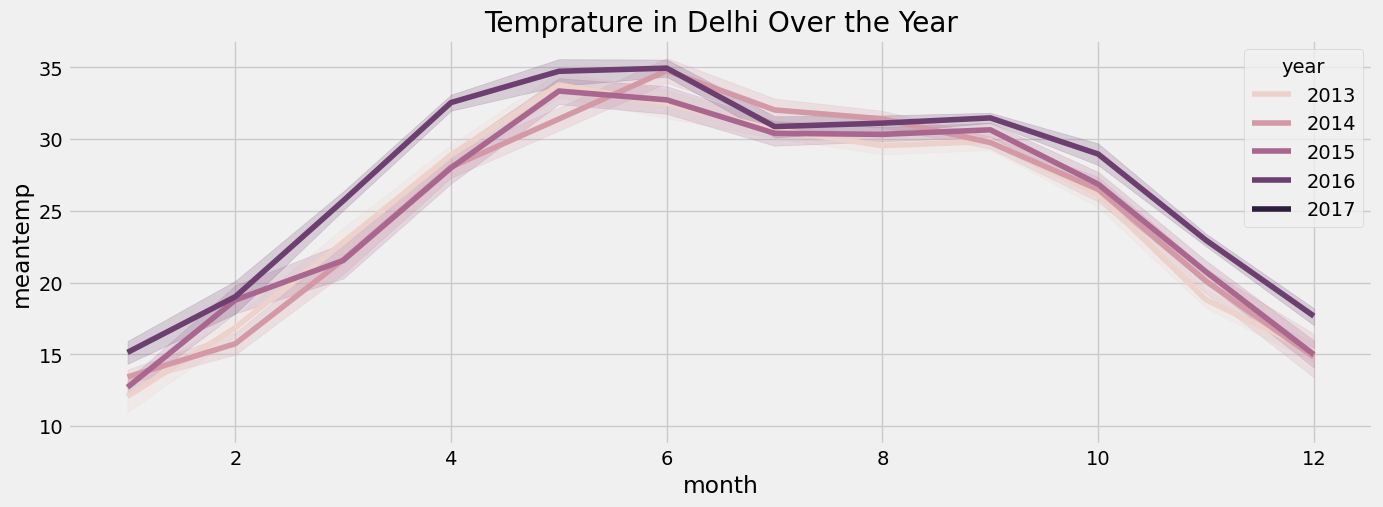

In [22]:
#Now let's have a look at the temprature change in Delhi over the year
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))
plt.title("Temprature in Delhi Over the Year")
sns.lineplot(data=data, x="month", y="meantemp", hue="year")
plt.show()

In [24]:
# The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:
forecasted_data = data.rename(columns={"date":"ds",
                                       "meantemp":"y"})

print(forecasted_data)

             ds          y    humidity  wind_speed  meanpressure       Date  \
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667 2013-01-01   
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000 2013-01-02   
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667 2013-01-03   
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667 2013-01-04   
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000 2013-01-05   
...         ...        ...         ...         ...           ...        ...   
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217 2016-12-28   
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762 2016-12-29   
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762 2016-12-30   
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000 2016-12-31   
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000 2017-01-01   

      year  month  
0     2013      1  
1     2013 

In [25]:
#Now below is how we can use the Facebook prophet model for weather forecasting
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecasted_data)
forecast = model.make_future_dataframe(periods=365)
predictions = model.predict(forecast)
plot_plotly(model, predictions)


16:34:59 - cmdstanpy - INFO - Chain [1] start processing
16:35:00 - cmdstanpy - INFO - Chain [1] done processing
